In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import random

import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

from EDA import run_eda

In [24]:
SEED = 111
random.seed(SEED)
np.random.seed(SEED)

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [3]:
data = pd.read_csv("../data_folder/raw_data/train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.00,0.85,0.56,1.00,-4.96,1,0.05,0.02,NaN,0.08,0.90,134.07,"234,596.00",4,5
1,Boston,Hitch a Ride,54.00,0.38,0.81,3.00,-7.23,1,0.04,0.00,0.00,0.10,0.57,116.45,"251,733.00",4,10
2,The Raincoats,No Side to Fall In,35.00,0.43,0.61,6.00,-8.33,1,0.05,0.49,0.00,0.39,0.79,147.68,"109,667.00",4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.00,0.85,0.60,10.00,-6.53,0,0.06,0.02,NaN,0.12,0.57,107.03,"173,968.00",4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.00,0.17,0.97,2.00,-4.28,1,0.22,0.00,0.02,0.17,0.09,199.06,"229,960.00",4,10


Hi there, fellow researcher.

Dataframe consists of 17 variables and 17996 observations

Following variables can be classified as string-type: ('Artist Name', 'Track Name')
Following variables can be classified as number-type: ('Popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms')
Following variables can be classified as factor-type: ('key', 'mode', 'time_signature', 'Class')
Criteria are unique values count (lower than 35 is factor) and then data type ("int64"/"float64" is number, "object" is string).

1) Basic statistics for factor-type variables.

For variable "key:
- Counts:
key
7.00     2097
2.00     1994
9.00     1961
1.00     1680
4.00     1549
11.00    1476
5.00     1397
6.00     1190
8.00     1119
10.00    1010
3.00      509
- Frequencies:
key
7.00    11.65
2.00    11.08
9.00    10.90
1.00     9.34
4.00     8.61
11.00    8.20
5.00     7.76
6.00     6.61
8.00     6.22
10.00   

,Popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
count,"17,568.00","17,996.00","17,996.00","17,996.00","17,996.00","17,996.00","13,619.00","17,996.00","17,996.00","17,996.00","17,996.00"
mean,44.51,0.54,0.66,-7.91,0.08,0.25,0.18,0.20,0.49,122.62,"200,744.46"
std,17.43,0.17,0.24,4.05,0.08,0.31,0.30,0.16,0.24,29.57,"111,989.13"
min,1.00,0.06,0.00,-39.95,0.02,0.00,0.00,0.01,0.02,30.56,0.50
25%,33.00,0.43,0.51,-9.54,0.03,0.00,0.00,0.10,0.30,99.62,"166,337.00"
50%,44.00,0.55,0.70,-7.02,0.05,0.08,0.00,0.13,0.48,120.07,"209,160.00"
75%,56.00,0.66,0.86,-5.19,0.08,0.43,0.20,0.26,0.67,141.97,"252,490.00"
max,100.00,0.99,1.00,1.35,0.95,1.00,1.00,1.00,0.99,217.42,"1,477,187.00"
n_outliers,883.00,719.00,550.00,"1,224.00","2,085.00","1,115.00","2,480.00","1,237.00",0.00,333.00,"3,882.00"


Numeric variables visualization:


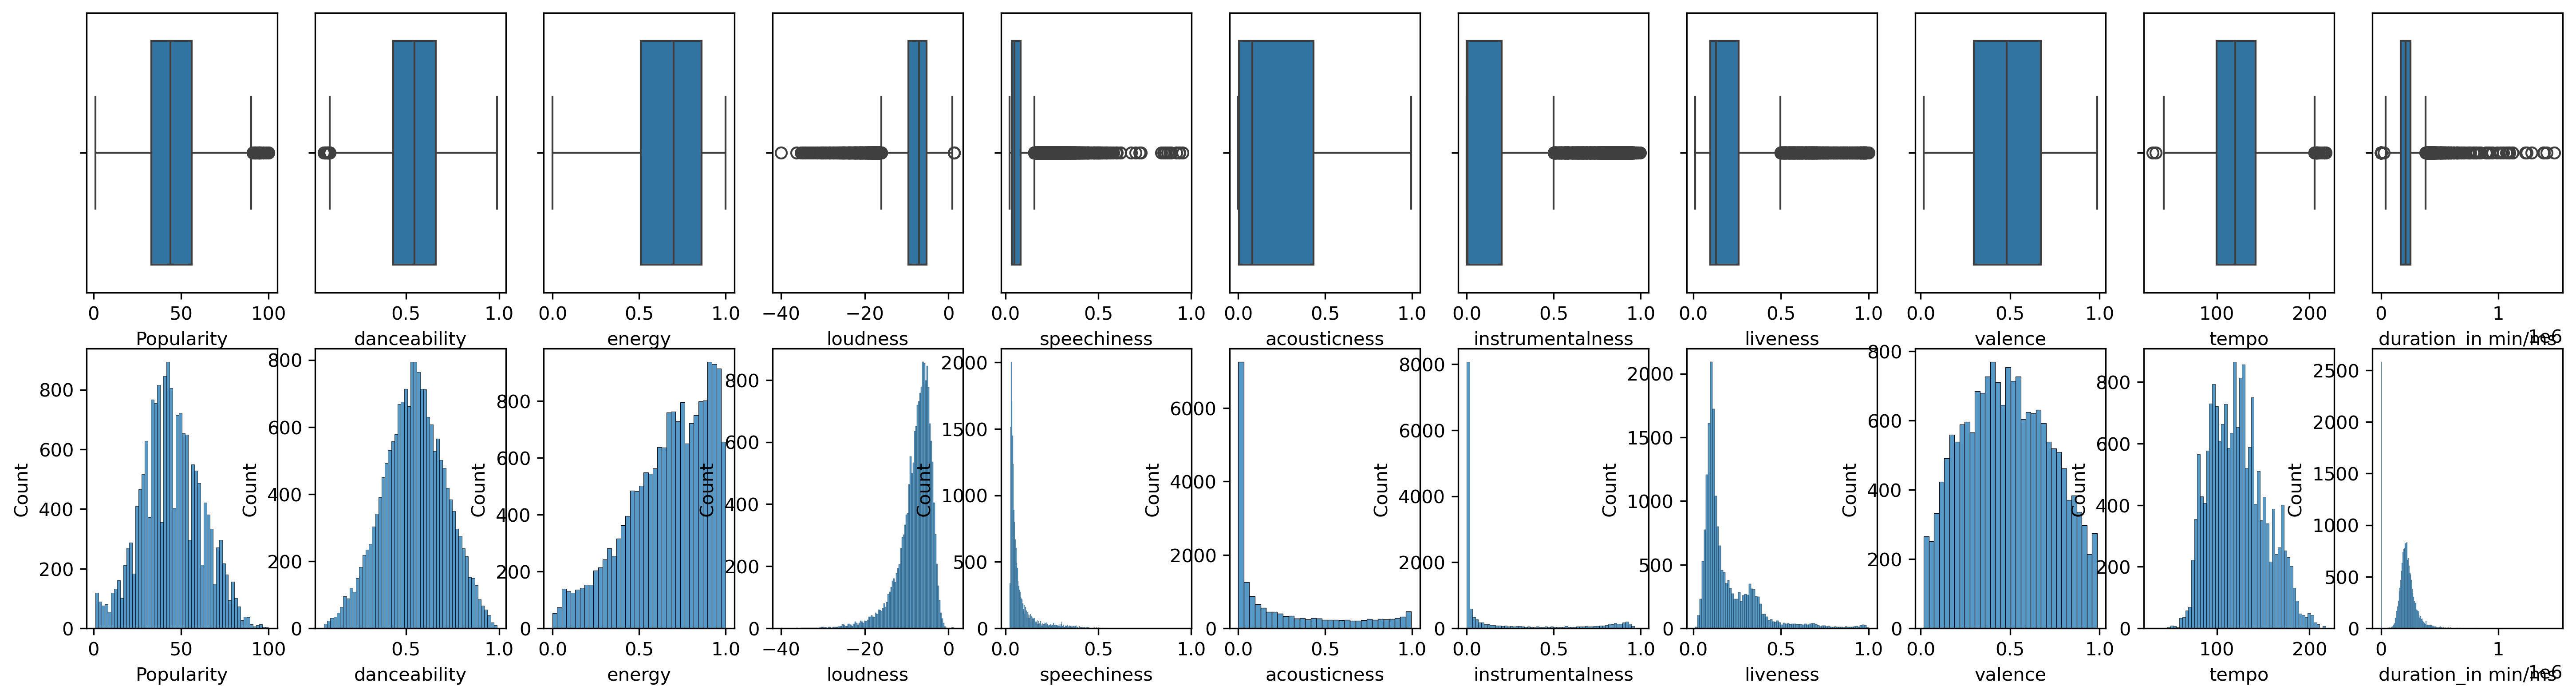

3) NA values:
- Total NA count is 6819 in 6183 rows.
- Following columns contain NA: ('Popularity', 'key', 'instrumentalness')

Dataframe contains 0 duplicates.


d:\Users\d2707\Documents\Colab Notebooks\Курсы\Институт биоинформатики\Семестр 2\ML\BI_ML_2024\HW4_dt\code\EDA.py:77: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)


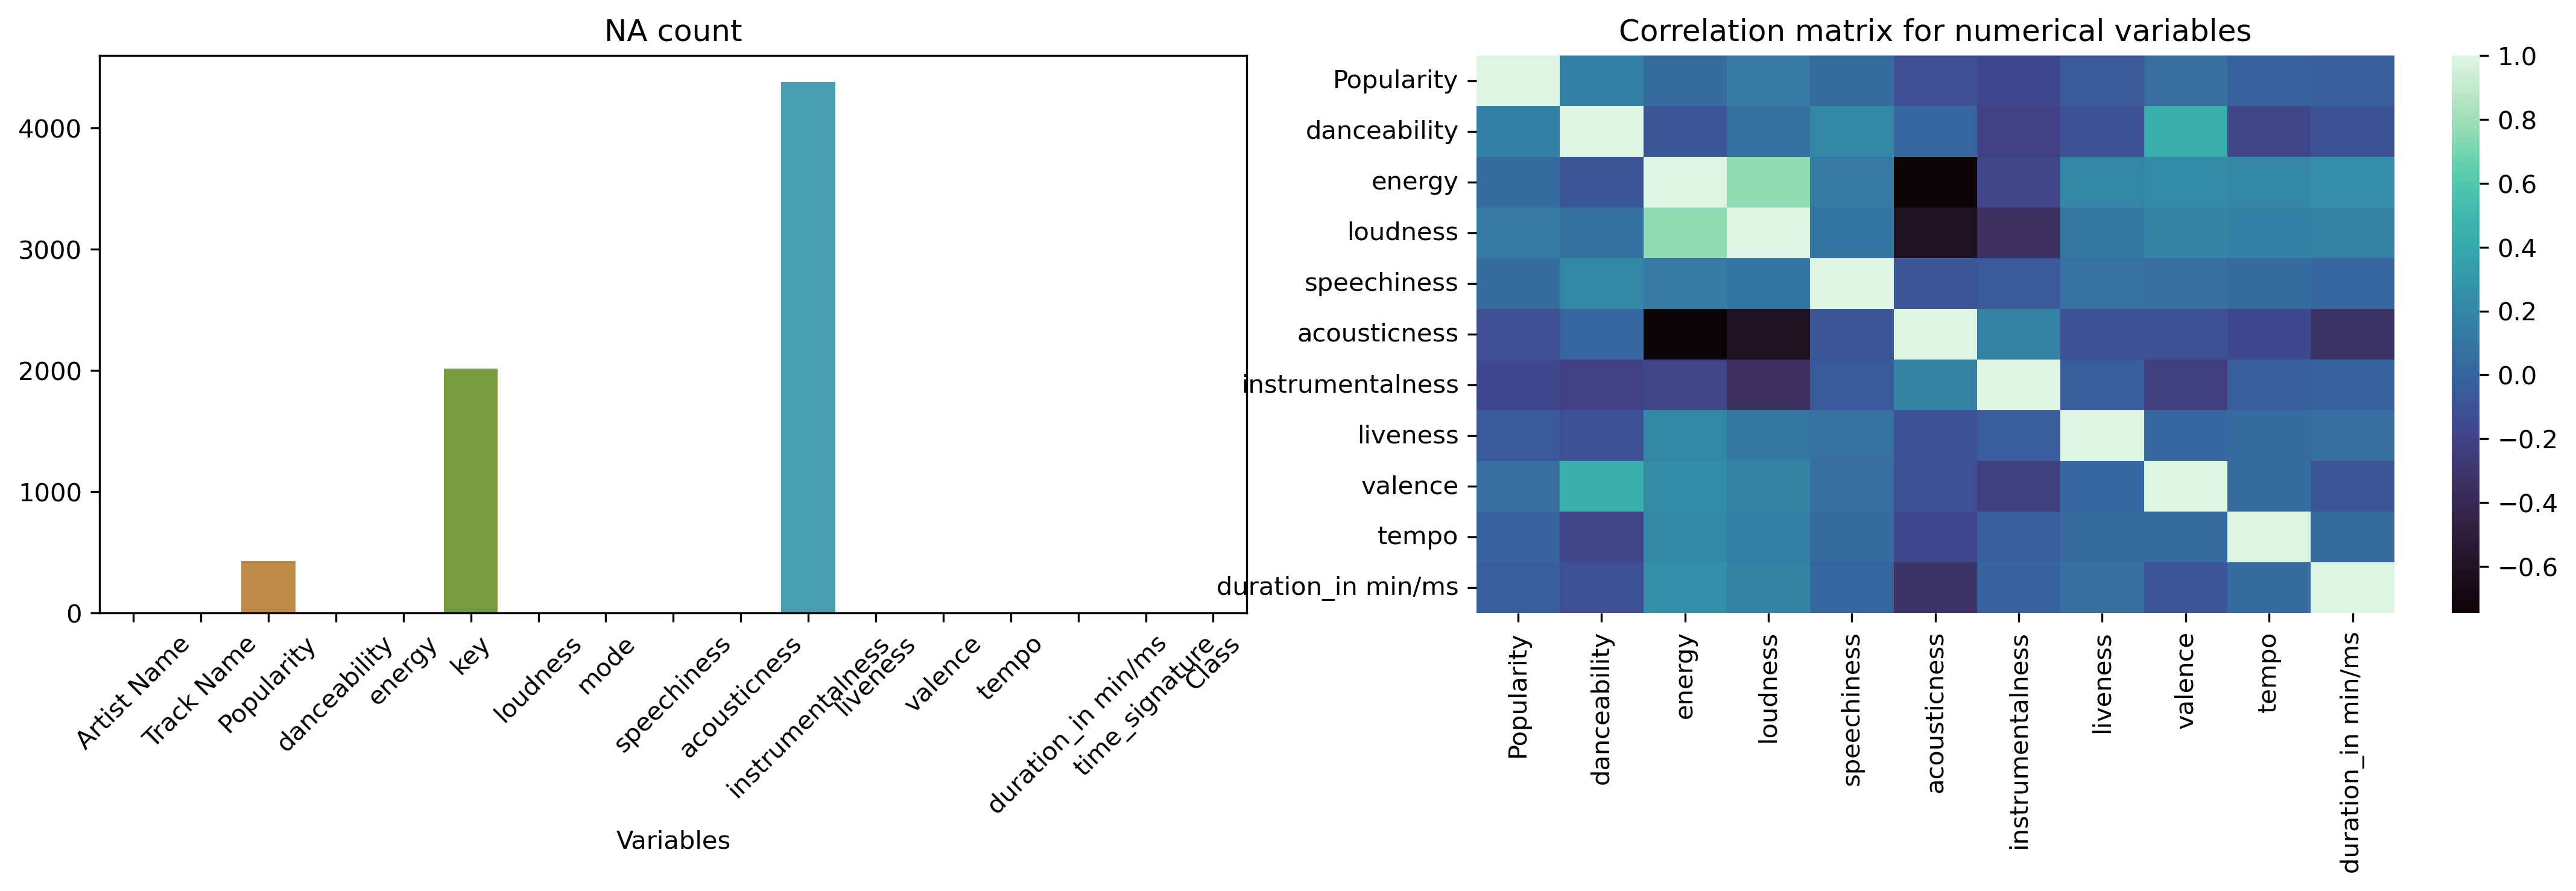

In [14]:
run_eda(data)

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

#### Вручную

In [25]:
X, y = data.loc[:, 'Popularity':'time_signature'], data[['Class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=SEED)

In [27]:
for col in tuple(('key', 'mode', 'time_signature')):
    column = X_train[[col]]
    ohe = OneHotEncoder(sparse_output=False, drop="first")
    ohe.fit(column)
    X_train[col] = ohe.transform(column)

#### `Pipeline`

In [ ]:
#TBD, не закончено
cat_cols = ['key', 'mode', 'time_signature', 'Class']
num_cols = ['Popularity', 'danceability', 'energy',
            'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence',
            'tempo', 'duration_in min/ms']
all_features = cat_cols + num_cols

target = data['Class'].values

preprocessor = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(drop='first'), cat_cols)
])

dt = DecisionTreeClassifier()

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dt_classifier', DecisionTreeClassifier())
])


param_grid = {
    'dt_classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'dt_classifier__max_depth': []
}
search = GridSearchCV(dt_pipeline, param_grid)
search.fit(X_train, y_train)

### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1.

2.

3.